# Objectives: 

#### The objectives of this project are as follows:

#### 1. To experiment with different classification methods to see which yields the highest accuracy
#### 2. To determine which features are the most indicative for predicting the quality of  wine

#   

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')

#  

# Data Collection

In [2]:
raw_data = pd.read_csv('winequality-red.csv')
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#  

# Data description

In [3]:
data = raw_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

#   

# Data Cleaning

### 1. Checking missing values

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So there are no missing values

### 2.  Outlier Detection

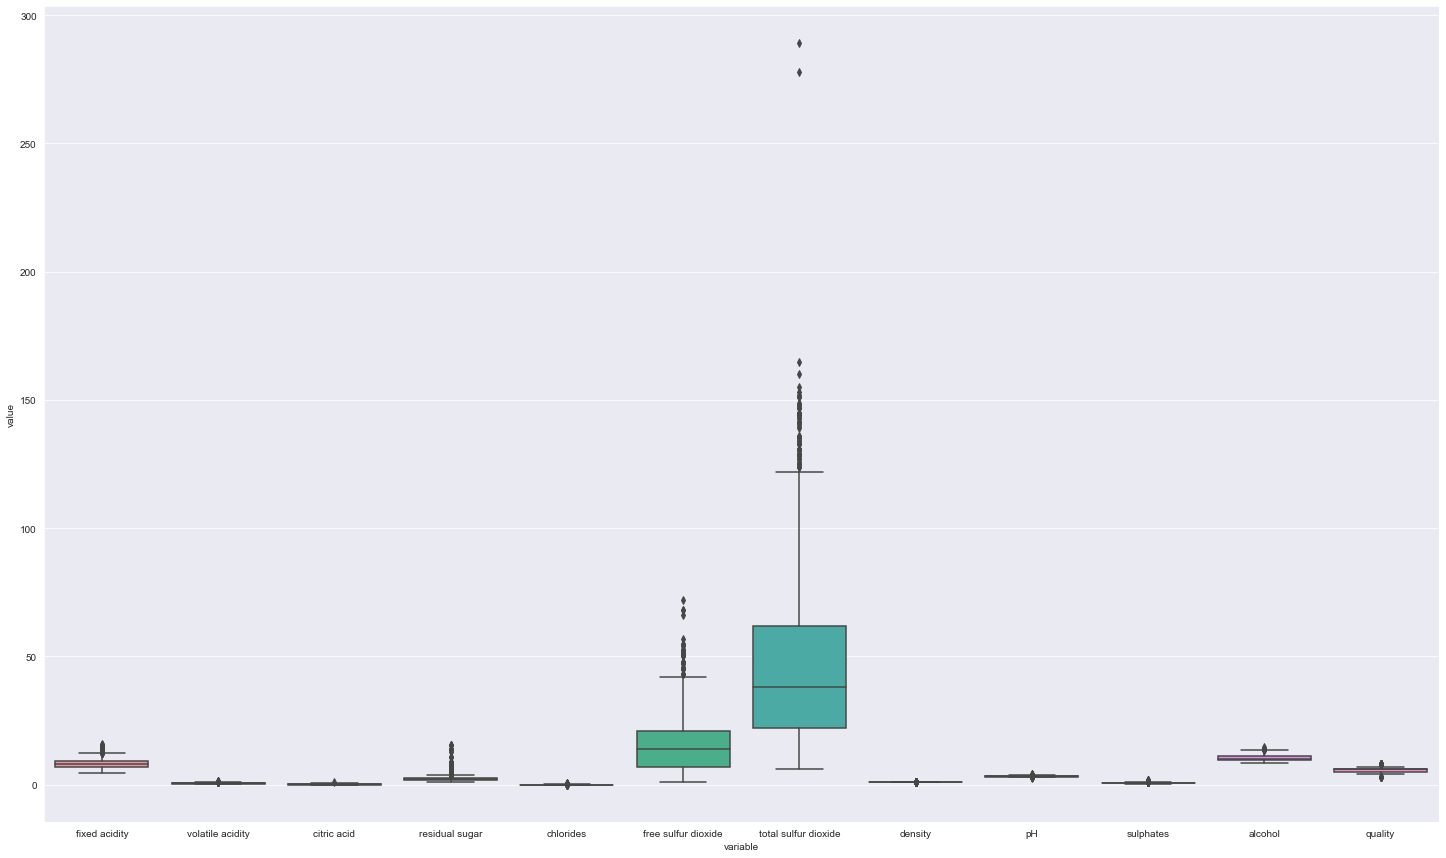

In [7]:
plt.figure(figsize = (25,15))
sns.boxplot(data = pd.melt(data) , x = 'variable', y = 'value')
plt.show()

#### So there are some outliers in the 'total sulfer dioxide' column

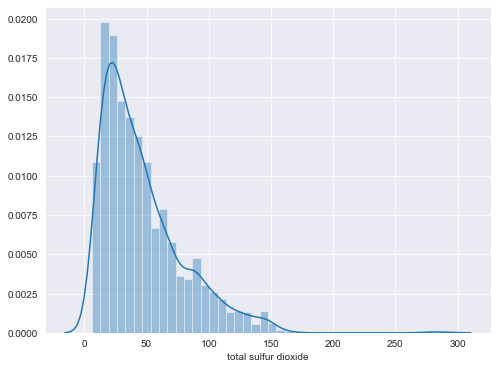

In [8]:
plt.figure(figsize = (8,6))
sns.distplot(data['total sulfur dioxide'])
plt.show()

#  

### Removing outliers from data :

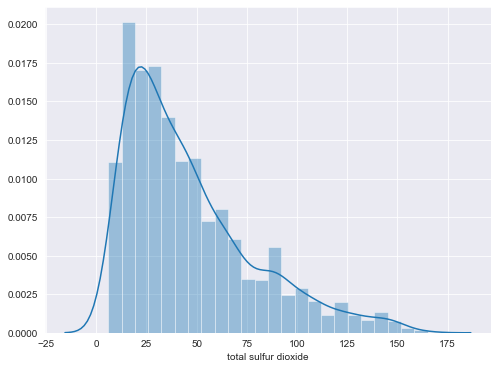

In [9]:
data = data[data['total sulfur dioxide']<180]
plt.figure(figsize = (8,6))
sns.distplot(data['total sulfur dioxide'])
plt.show()

#### Checking the data again with a boxplot

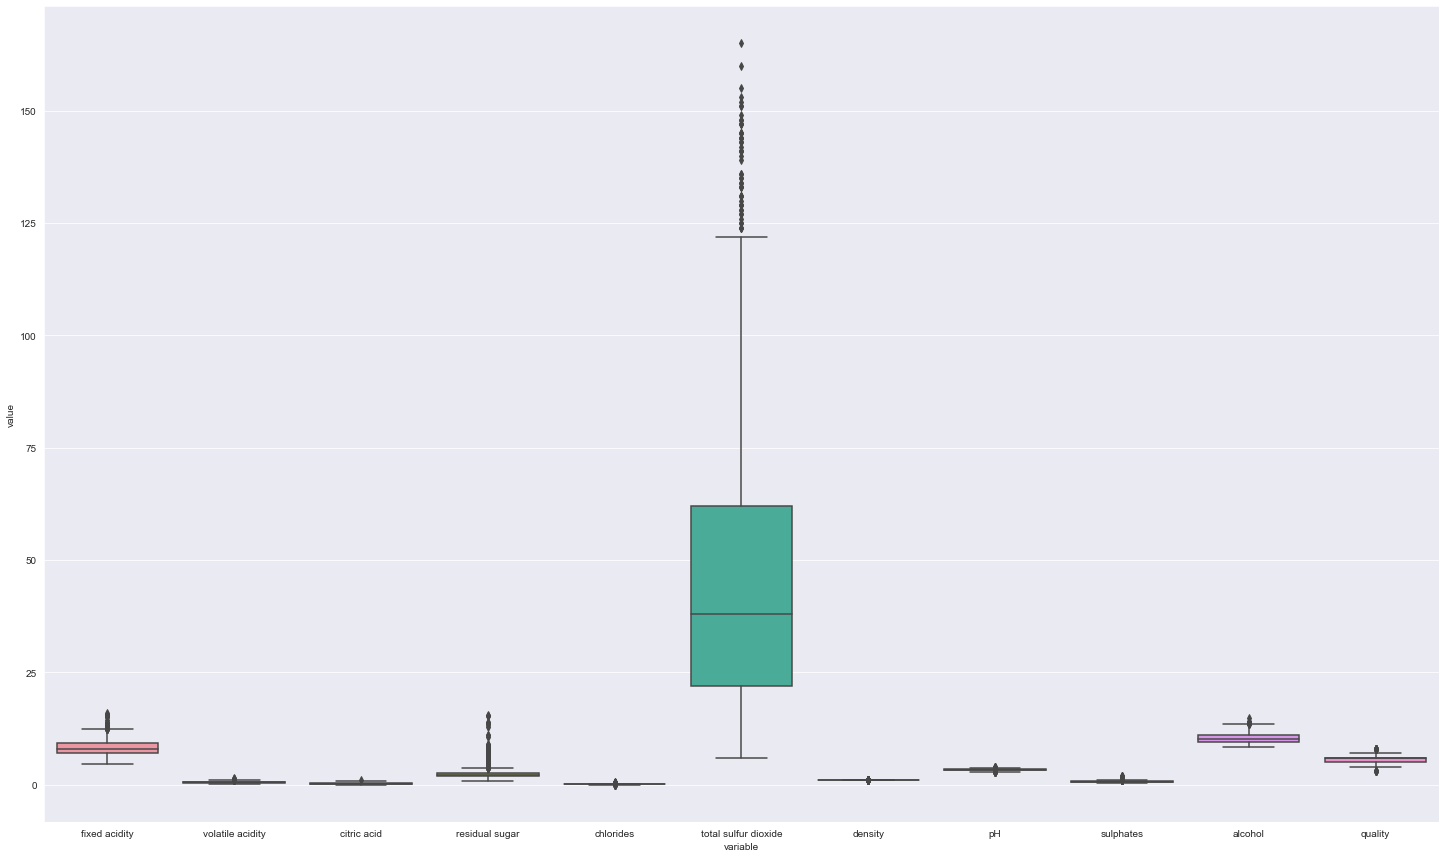

In [46]:
plt.figure(figsize = (25,15))
sns.boxplot(data = pd.melt(data) , x = 'variable', y = 'value')
plt.show()

### Checking the distribution of quality

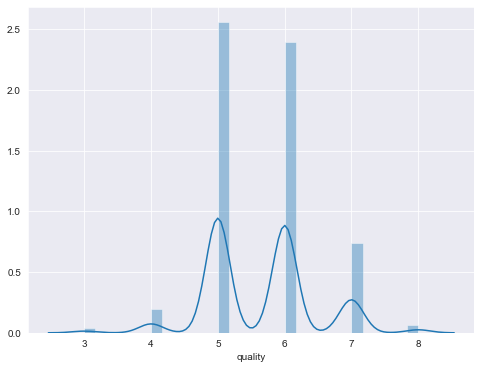

In [11]:
plt.figure(figsize = (8,6))
sns.distplot(data['quality'])
plt.show()

#  

# Data Exploration

#### Let's first check which features are correlated with each other with a correclation heatmap

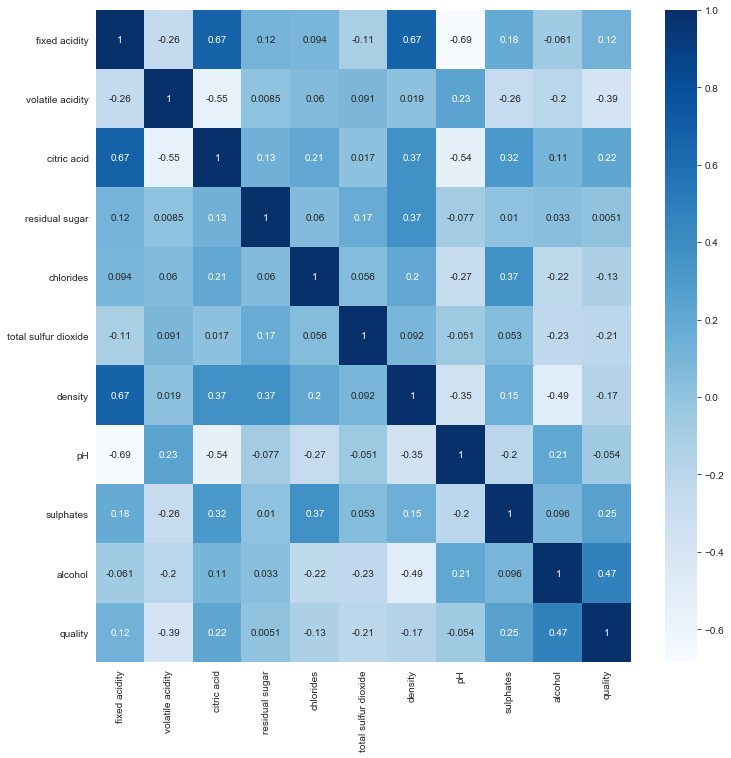

In [45]:
plt.figure(figsize =(12,12))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)
plt.show()

#### The density and citric acid are highly correlated with fixed acidity. Again, total sulfur dioxide and free sulfer dioxide are highly correlated to each other. 

This is the multicollinearity. This results in unstable parameter estimates of regression which makes it very difficult to assess the effect of independent variables on dependent variables.

We will use Variance inflation factor to analyze which variable has a high correlation.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['density', 'citric acid', 'total sulfur dioxide', 'free sulfur dioxide']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,5.766339,density
1,2.977279,citric acid
2,5.719141,total sulfur dioxide
3,6.111220,free sulfur dioxide


'free sulfur dioxide' has a correlation above 5 and needs to be dropped

In [14]:
data = data.drop('free sulfur dioxide', axis = 1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


##  

Let's check the Variance inflation factor for the remaining 3 variables after dropping the 'free sulfur dioxide' column.

In [15]:
variables = data[['density', 'citric acid', 'total sulfur dioxide']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.986768,density
1,2.943658,citric acid
2,3.108202,total sulfur dioxide


#### As the vif of these variables are below 5, there's no multicolinearity.

#  


Now, let's check which features are most important for our quality predictions. For this we will use Extra Tree classifier,

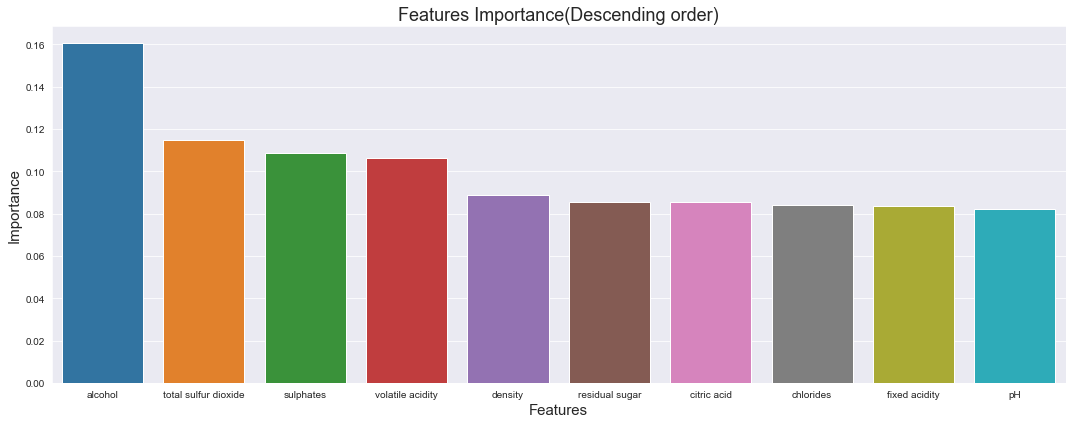

In [16]:
from sklearn.ensemble import ExtraTreesClassifier 

X = data.drop('quality', axis = 1)
Y = data['quality']

model =  ExtraTreesClassifier()
model.fit(X,Y)

features = pd.DataFrame()
features['Features'] = X.columns
features['Importance'] = model.feature_importances_

plt.figure(figsize =(15,6))
sns.barplot(y='Importance', x='Features', data=features,  order=features.sort_values('Importance',ascending = False).Features)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.title("Features Importance(Descending order)", size=18)
plt.tight_layout()

#### We can observe that except the pH column , all other features comprises 95% of the data that influences a wine quality. So we are going to use these 9 features for our models.

In [17]:
data_new = data.drop('pH', axis = 1)
data_new.shape

(1597, 10)

#### Since the features are measured in different units , wee need to standardize the values. for that, we use Standard Scaler. 
##### Standard scaler scales the values with mean = 0 and standard deviation = 1.

In [18]:
from sklearn.preprocessing import StandardScaler

x = data_new.drop('quality', axis = 1)
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [19]:
x_scaled.shape

(1597, 9)

Let's observe the distribution of wine quality in the data 

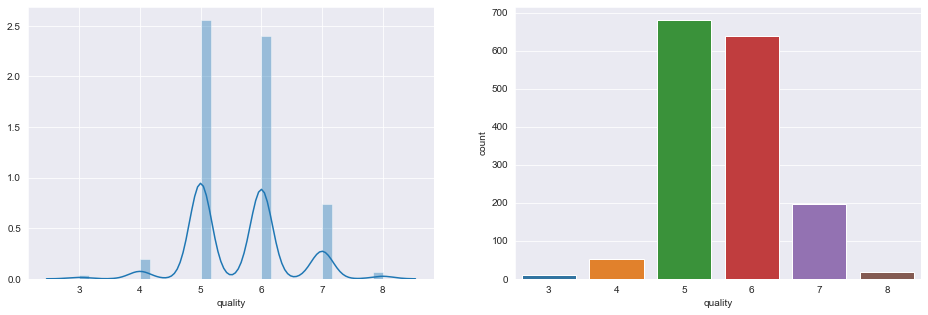

In [20]:
plt.figure(figsize =(16,5))
plt.subplot(1,2,1)
sns.distplot(data['quality'])
plt.subplot(1,2,2)
sns.countplot(data['quality'])#Showing the frequency of occurence of a particular quality rating
plt.show()

#### Now we will categorize the ratings into 3 categories , 'Bad', 'Normal' , 'Good'.

In [21]:
category = [] # Defining an empty array
for x in data['quality']:
    if x>=1 and x<=3:
        category.append('Bad')
    elif x>=4 and x<=6:
        category.append('Normal')
    elif x>=7 and x<=10:
        category.append('Good')
        
        
data_new['category'] = category #Assigning a new column
data_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,5,Normal
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,5,Normal
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,5,Normal
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,6,Normal
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,5,Normal


In [22]:
data_final = data_new.copy()
data_final = data_final.drop('quality',axis =1)
data_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Normal
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,Normal
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,Normal
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,Normal
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,Normal


In [23]:
data_final['category'].value_counts() #Checking the number of ratings in each category

Normal    1372
Good       215
Bad         10
Name: category, dtype: int64

##  

# Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

#defining inputs(independent) and targets(dependent) variables
inputs = x_scaled
targets = data_final['category']

#splitting into training and testing data

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 42)

In [25]:
x_train.shape, y_train.shape

((1277, 9), (1277,))

In [26]:
x_test.shape, y_test.shape

((320, 9), (320,))

#  

# Models

#### Since this a Classification problem , we are mainly going to use :

#### 1. Logistic Regression

#### 2. Decision Tree Classifier

#### 3. Support Vector Classifier

#### 4. Random Forest Classifier

#### 5. K-Nearest Neighbours


#  

In [27]:
#Defining a method or function that will print the cross validation score and accuracy for each model

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def model_report(cl):
    
    cl.fit(x_train, y_train)

    print('Cross Val Score: ',(cross_val_score(cl,x_train,y_train, cv=5).mean()*100).round(2))#using a 5-Fold cross validation

    y_pred = cl.predict(x_test)

    print('Accuracy Score: ', (accuracy_score(y_test,y_pred)*100).round(2))

#  

## 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model_report(lr)

Cross Val Score:  87.31
Accuracy Score:  87.81


#  

## 2. Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

model_report(dt)

Cross Val Score:  84.57
Accuracy Score:  86.56


#  

## 3. Support Vector Classifer

In [30]:
from sklearn.svm import SVC

svc = SVC()

model_report(svc)

Cross Val Score:  87.86
Accuracy Score:  89.38


#  

## 4. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

model_report(rf)

Cross Val Score:  89.04
Accuracy Score:  90.94


##  

## 5. K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(algorithm ='auto')

model_report(kn)

Cross Val Score:  86.22
Accuracy Score:  88.75


#  

## Hyper Parameter Tuning 

#### Lets try to tune our models and see if we can improve accuracy. For this we will use GridSearchCV 

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.

In [33]:
from sklearn.model_selection import GridSearchCV

#Defining a function that will calculate the best parameters and accuracy of the model based on those parameters
#Using GridSearchCV

def grid_search(classifier,parameters):
    
    grid = GridSearchCV(estimator = classifier,
                        param_grid = parameters,
                        scoring = 'accuracy',
                        cv = 5,
                        n_jobs = -1
                        )
    
    grid.fit(x_train,y_train)

    print('Best parameters: ', grid.best_params_) #Displaying the best parameters of the model

    print("Accuracy: ", ((grid.best_score_)*100).round(2))#Accuracy of the model based on those parameters

#  

## 1. Support Vector Classifier

In [34]:
param_svc = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [0.0001, 0.001, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
    'kernel': ['linear','rbf']
    }
svc = SVC()

grid_search(svc,param_svc)

Best parameters:  {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
Accuracy:  88.8


In [35]:
#Training the model again with the best parameters we got
svc = SVC(C = 10, gamma = 0.3, kernel='rbf')

model_report(svc)

Cross Val Score:  88.8
Accuracy Score:  90.62


##### So, the accuracy of our Support Vector Classifier model increased from 89.38% to 90.62% 

#  

## 2. Random Forest 

In [36]:
param_rf = {
    'n_estimators': [10,50,100,500,1000],
    'min_samples_leaf': [1,10,20,50]
    }
rf = RandomForestClassifier(random_state = 0)
grid_search(rf,param_rf)

Best parameters:  {'min_samples_leaf': 1, 'n_estimators': 1000}
Accuracy:  89.59


In [37]:
#Training the model again with the best parameters we got
rf = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 1,random_state = 0)
model_report(rf)

Cross Val Score:  89.59
Accuracy Score:  92.19


##### So, the accuracy of our Random Forest Classifier model increased from 91.25% to 92.19%

#  

## 3. K-Nearest Neighbors

In [38]:
n_neighbors = list(range(5,10))#This is basically the value of k
                   
param_knn = {
    'n_neighbors' : n_neighbors,
    'p' : [1,2]
    
    }

knn = KNeighborsClassifier(algorithm ='auto', n_jobs = -1)
grid_search(knn,param_knn)

Best parameters:  {'n_neighbors': 7, 'p': 2}
Accuracy:  86.53


In [39]:
#Training the model again with the best parameters we got
knn = KNeighborsClassifier(n_neighbors = 7, p = 2, algorithm ='auto', n_jobs = -1)
model_report(knn)

Cross Val Score:  86.53
Accuracy Score:  88.75


##### Looks like hyper parameter tuning did'nt changed the accuracy of K-Nearest Neighbors

#  

#### Lastly we will use some boosting algorithms mainly :
#### 1. AdaBoost
#### 2. Gradient Boost
#### 3. XGBoost

#  

## 1. AdaBoost

In [40]:
from sklearn.ensemble import  AdaBoostClassifier

ab = AdaBoostClassifier(random_state = 42)

model_report(ab)

Cross Val Score:  68.36
Accuracy Score:  67.5


##### So, AdaBoost is'nt a good model to perform on this dataset 

#  

## 2. Gradient Boost

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 42, learning_rate = 0.2)

model_report(gb)

Cross Val Score:  87.39
Accuracy Score:  90.0


##### Gradient boost gives quite better accuracy than AdaBoost.

#  

## 3. XGBoost

In [42]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state = 42, learning_rate = 0.2)

model_report(xg)

Cross Val Score:  88.96
Accuracy Score:  92.81


### So , comparing all the models , Random Forest(92.19% accuracy) and XGBoost(92.81%) seems to give the highest accuray.


##    

Finally , let's see which features contributed most in each of these 2 models.

## Random Forest:

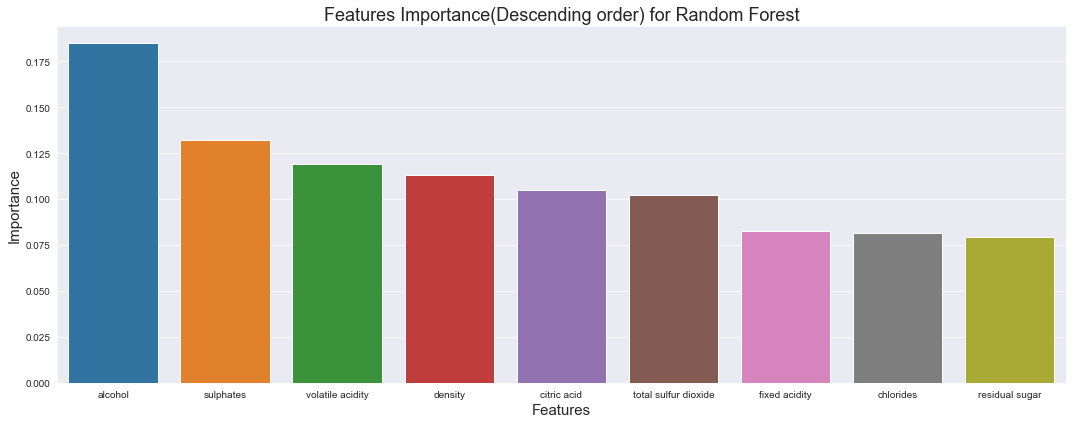

In [43]:
features_rf = pd.DataFrame()
x_rf = data_final.drop('category',axis=1)
features_rf['Features'] = x_rf.columns
features_rf['Importance'] = rf.feature_importances_

plt.figure(figsize =(15,6))
sns.barplot(y='Importance', x='Features', data=features_rf,  order=features_rf.sort_values('Importance',ascending = False).Features)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.title("Features Importance(Descending order) for Random Forest", size=18)
plt.tight_layout()

##  

## XGBoost:

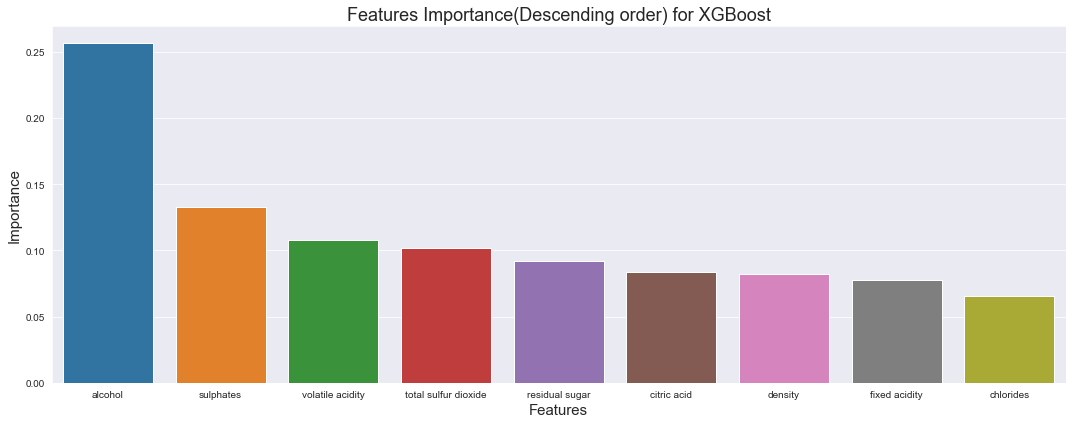

In [44]:
features_xg = pd.DataFrame()
x_xg = data_final.drop('category',axis=1)
features_xg['Features'] = x_xg.columns
features_xg['Importance'] = xg.feature_importances_

plt.figure(figsize =(15,6))
sns.barplot(y='Importance', x='Features', data=features_xg,  order=features_xg.sort_values('Importance',ascending = False).Features)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.title("Features Importance(Descending order) for XGBoost", size=18)
plt.tight_layout()

#  

# Conclusuion:

##### 1. For determing the quality of wines , alcohol plays a significant role followed by sulphates and volatile acididty.
##### 2. For predicting quality of wines, we can either use Random Forest or XGBoost model. However,  XGBoost has a slightly better accuracy(0.62% more accurate) over Random Forest.

#  